In [ ]:
#  Titanic Data Analysis & Survival Prediction – EDA Notebook  
#  Amazon ML Summer School cohort lead by "Girls Leading Tech" -Minor Project Submission  

# **Name:** Jeevitha Arumugam  
# **Course:** B.Tech CSE – Data Science  
# **University:** Dayananda Sagar University Bangalore  
# **Academic Year:**  3rd Year  
# **Project Goal:** To Perform an insightful EDA and model-based analysis to understand the patterns behind survival on the Titanic dataset.


>>" Uncovering the human stories behind the Titanic — through the lens of DATA.”


In [ ]:
# As a first step, I'm importing the core libraries required for this project:

# - pandas: for efficient data loading, inspection, and manipulation.
# - numpy: to handle numerical operations and array-based transformations.
# - matplotlib.pyplot: to visualize data patterns and trends using basic plots.
# - seaborn: a powerful data visualization library built on top of matplotlib, great for statistical visualizations.

# These libraries form the backbone of most EDA and machine learning workflows in Python.


In [35]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Setting the seaborn style to 'whitegrid' to enhance the readability of plots 
# Using matplotlib inline to make sure all plots appear directly within the notebook — this is essential for interactive .


In [37]:
sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
# 1. Loading the Titanic training dataset into a pandas DataFrame.
# 2. This dataset contains details about passengers such as age, gender, ticket class, etc., and whether they survived or not.
# 3. Displaying the first 5 rows using head() function to get a quick overview of the structure and content of the data.


In [39]:
# Loading the dataset
df = pd.read_csv("train.csv")  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Exploring the dataset structure :
# 1. SHAPE - checking the overall shape (rows, columns) to understand dataset size.
# 2. DATA TYPE -  printing column data types to know which are numerical, categorical, or objects (like names or strings).
# 3. MISSING VALUE -  inspecting missing values in each column to plan for data cleaning or imputation.
# 4. SUMMARY - Using describe(include='all') to summarize both numeric and categorical features,
#   which helps assess central tendency, spread, and uniqueness across columns.


In [41]:
#shape
print("Shape of the dataset:", df.shape)

print("\nColumn types:\n")
print(df.dtypes)

# missing values
print("\nMissing values:\n")
print(df.isnull().sum())

# summary
df.describe(include='all')


Shape of the dataset: (891, 12)

Column types:

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Visualizing survival distribution:

# ** This count plot gives a quick overview of how many passengers survived vs. didn't survive.
# Since 'Survived' is our target variable (0 = Died, 1 = Survived), it's important to understand class balance.
# This helps us detect class imbalance early, which might affect model training later (e.g., bias towards majority class).


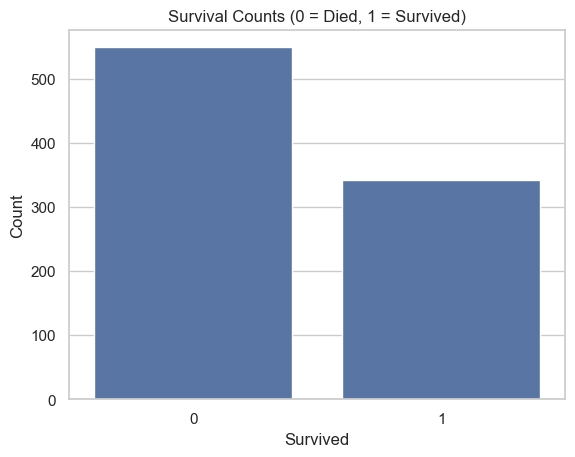

In [43]:
sns.countplot(data=df, x='Survived')
plt.title("Survival Counts (0 = Died, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [ ]:
# Checking and visualizing missing values:

# 1. I print the total number of missing values in each column (if any). This is crucial for deciding how to handle them—drop, fill, or impute.
# 2. Then, I use a heatmap to visually represent where missing values occur in the dataset. This makes it easier to spot patterns or clusters of missing data.
# For example, if certain rows or columns have heavy missingness, I might consider removing or treating them specifically.


Age         177
Cabin       687
Embarked      2
dtype: int64


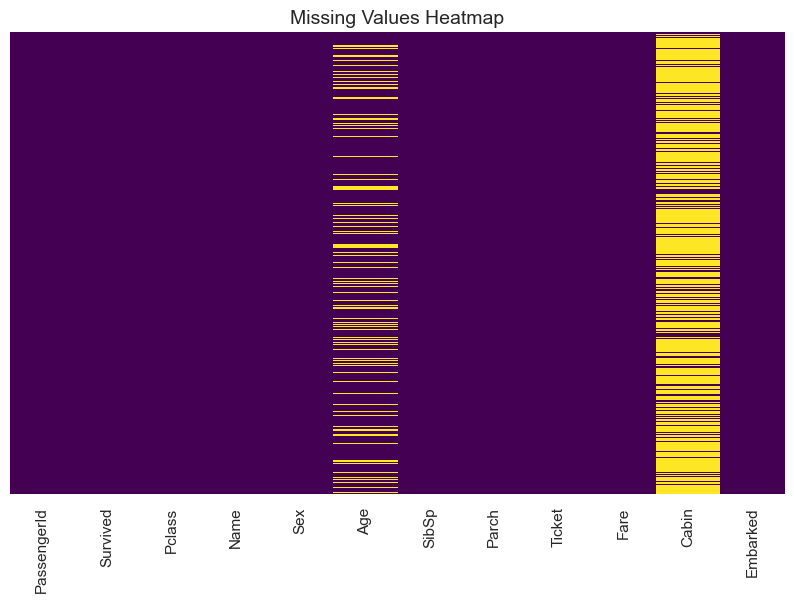

In [45]:
#missing values count and heat map
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

In [ ]:
# Handling missing values:
# After identifying missing values, I now handle them based on the type and percentage of missing data:
# - For the 'Age' column (numerical with ~20% missing), I fill the missing values with the median. Median is robust to outliers and preserves central tendency.
# - The 'Cabin' column has more than 75% missing data, making it unreliable. I drop it entirely to avoid introducing noise.
# - The 'Embarked' column is categorical with only 2 missing values. I fill these with the mode (most frequent category), which is a reasonable default.
# This cleaning step ensures the dataset is free of missing values and ready for further analysis and modeling.


In [47]:
#handling missing values:

#Age (Numerical, missing ~20%)
#Cabin (Categorical, missing > 75%)
#Embarked (Categorical, 2 missing)

# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
""" Verifying missing values post-cleaning:
    
    This confirms that my preprocessing steps 
    were effective and that the dataset is now clean for further analysis and modeling."""

In [49]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
""" Exploring Distribution of Categorical Features:

# In this step, I visualize the distribution of key categorical features —
* Sex,
* Pclass,
* Embarked, and 
* Survived.
# Using count plots with `hue=col` helps clearly observe the class-wise distribution within each feature. 
# This is important to understand potential imbalances or dominant classes and prepares us for later insights 


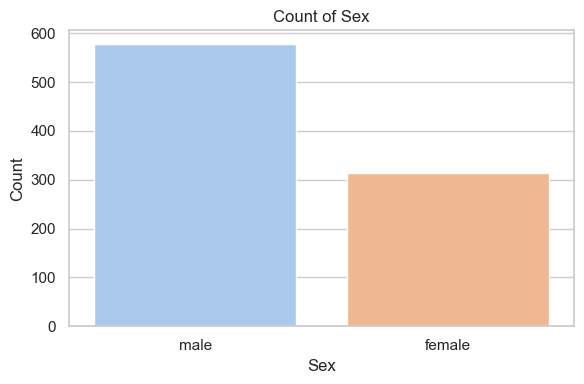

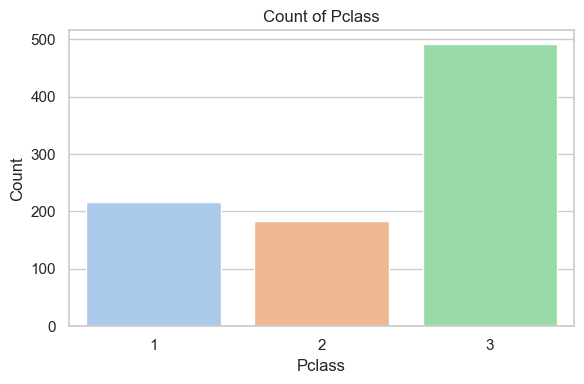

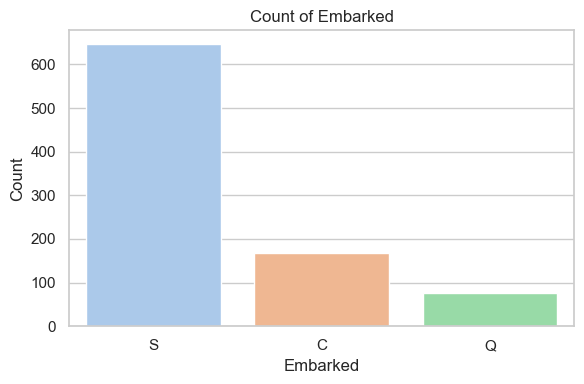

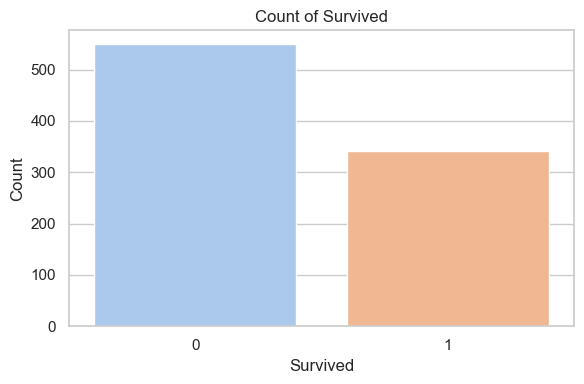

In [51]:
#Choosing plots based on variable types 

categorical_features = ['Sex', 'Pclass', 'Embarked', 'Survived']

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [ ]:
"""# Visualizing Numerical Feature Distributions & Their Relationship with Survival:
Here we depict the shape and spread of each numerical feature (via histogram & KDE) and
how it varies with survival outcome (via boxplot).

# I analyze each numerical feature in two ways:
# 1. A histogram with KDE to observe its overall distribution and spread.
# 2. A boxplot comparing distributions between survivors (1) and non-survivors (0).

# This dual visualization helps identify skewness, outliers, and whether a feature like 'Age', 'Fare', or 'SibSp' shows visible trends related to survival. It's a crucial step in identifying 
# potentially impactful features for modeling.
"""

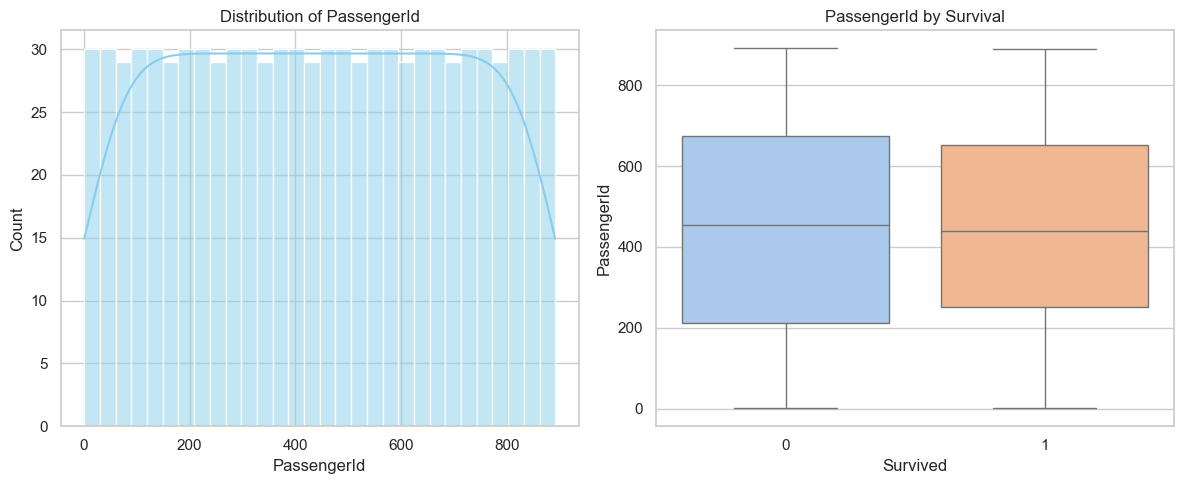

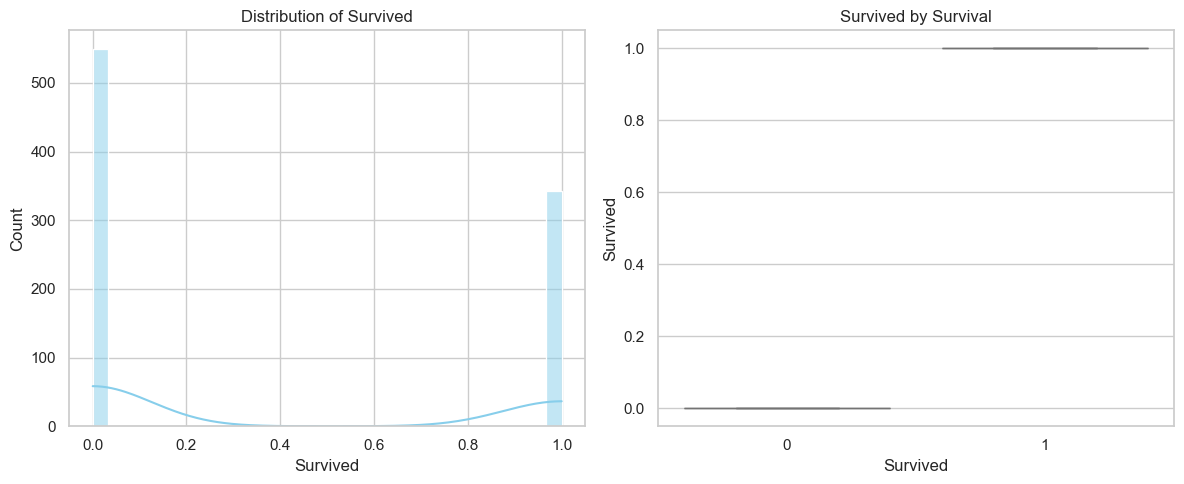

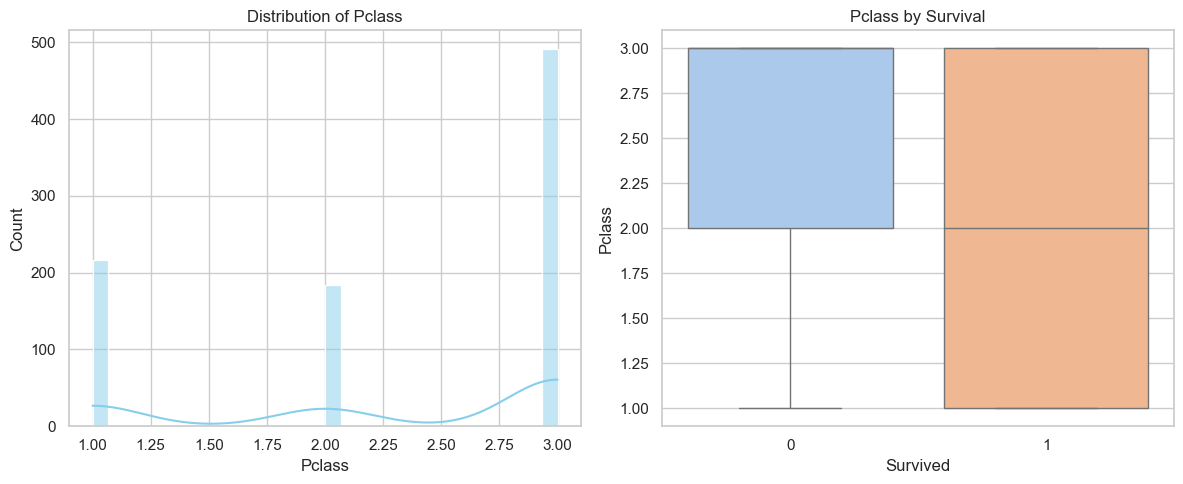

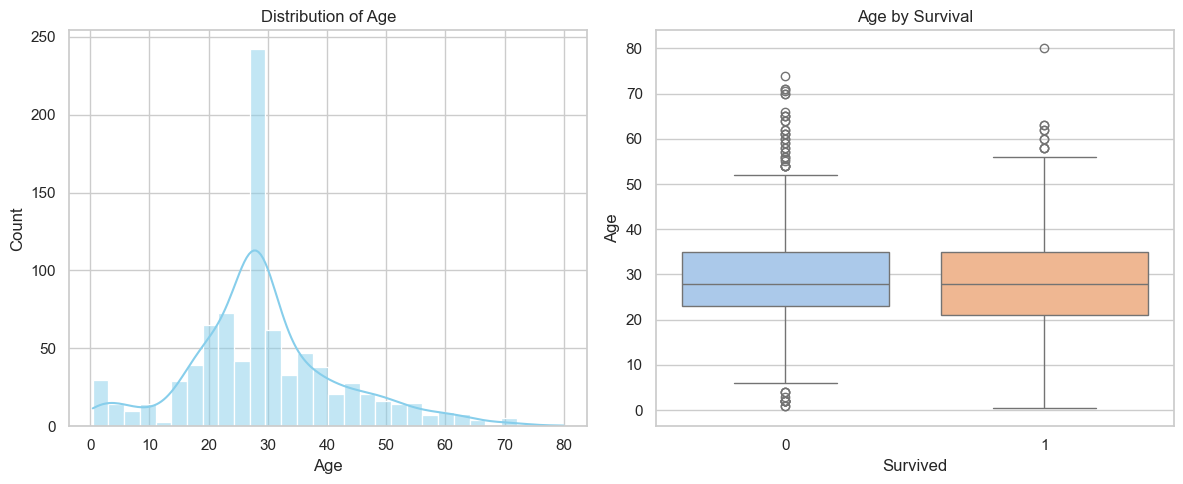

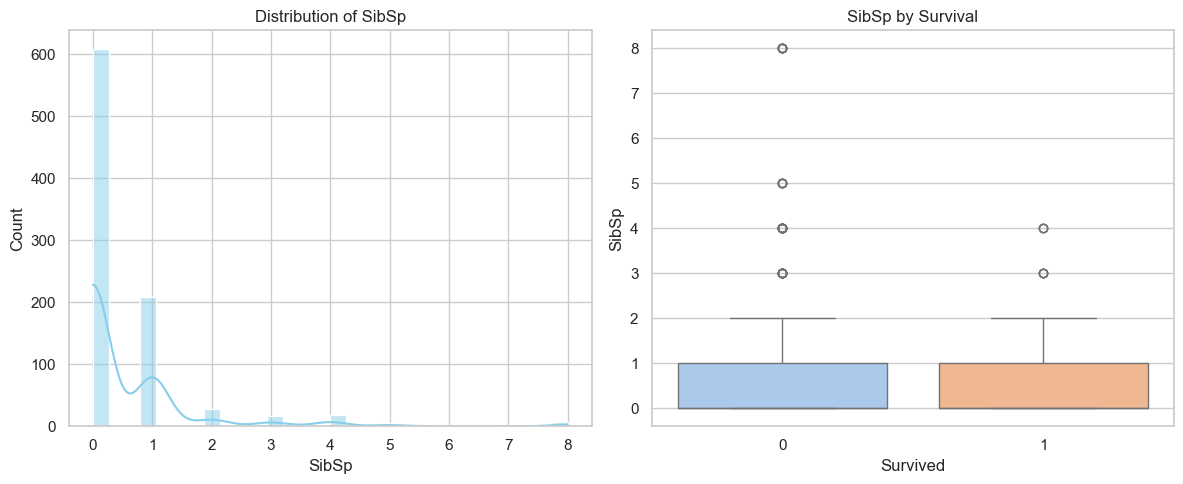

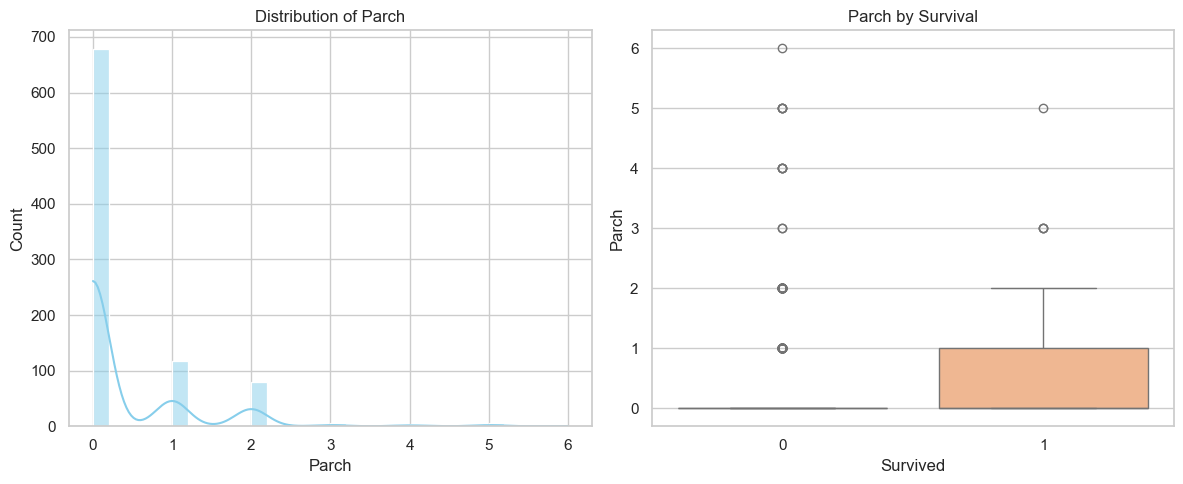

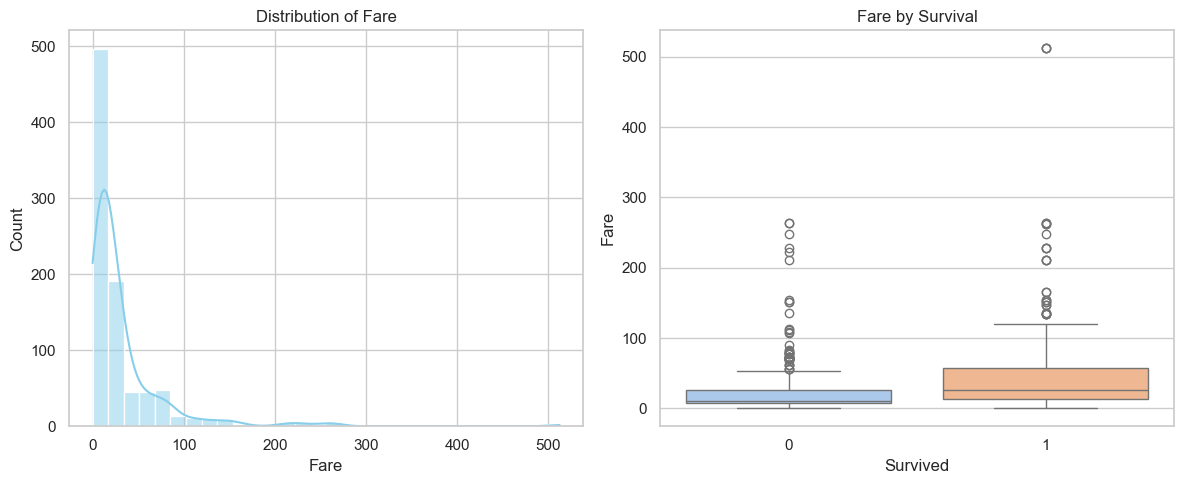

In [53]:
#Numerical Features 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram & KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    
    # Boxplot grouped by Survived
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Survived', y=col, hue='Survived', data=df, palette='pastel', legend=False)
    plt.title(f'{col} by Survival')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Exploring Relationship Between Categorical Features and Survival

# This analysis visualizes how different categories (like 'Sex', 'Pclass', 'Embarked', etc.)
# influence survival probability using count plots. By adding the 'Survived' hue, we clearly see
# which subgroups had better survival rates. For example, females and 1st class passengers tend 
# to show higher survival. This visual insight is key to detecting feature importance and 
# interaction patterns before modeling.


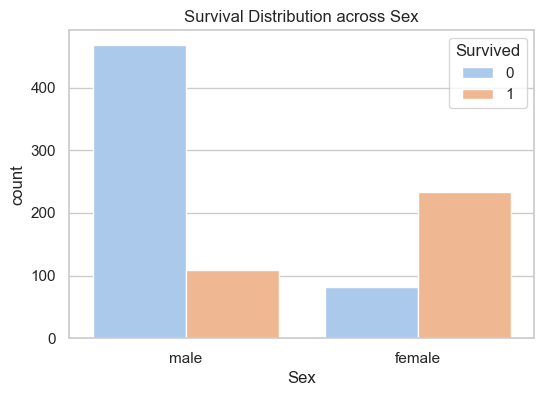

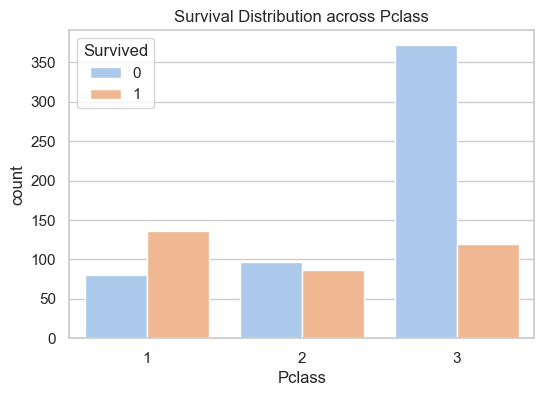

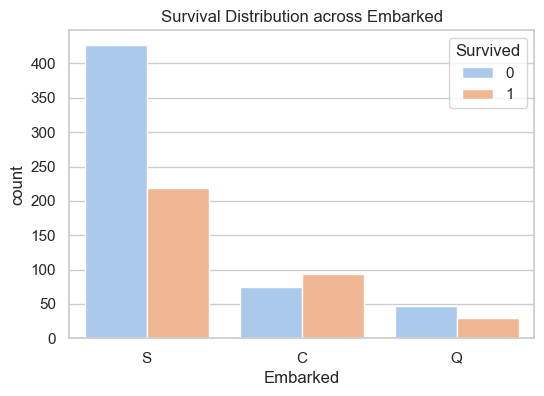

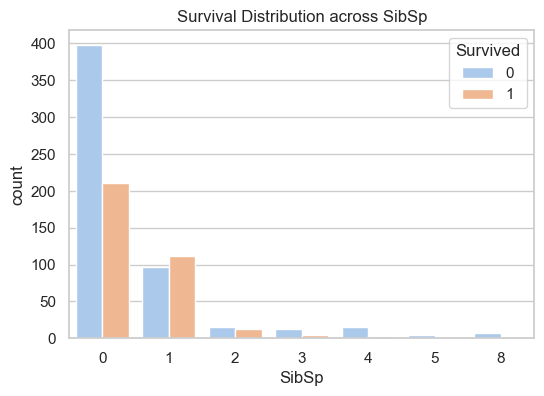

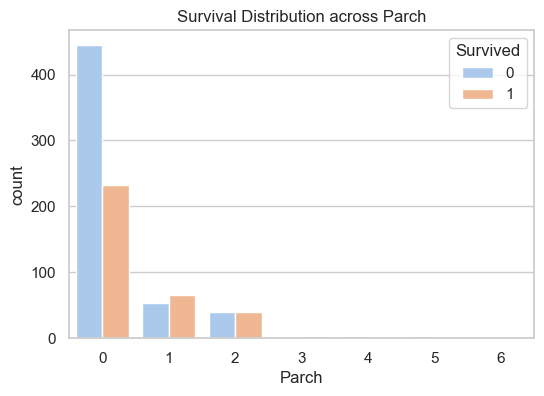

In [35]:
#Categorical Features vs Survived

categorical_cols = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Survived', palette='pastel')
    plt.title(f'Survival Distribution across {col}')
    plt.show()

In [ ]:
# Numerical Features vs. Survival Outcome

# This analysis uses boxplots to compare the distributions of numerical features like 'Age' and 'Fare' 
# across survival status (0 = Died, 1 = Survived). 

# - For 'Fare', we notice that survivors generally paid higher fares, possibly reflecting their access 
#   to higher-class cabins or better rescue priority.
# - For 'Age', while the difference is less pronounced, we can still observe survival variation across 
#   age groups.

# These visual cues help identify which numerical variables might be strong predictors of survival.


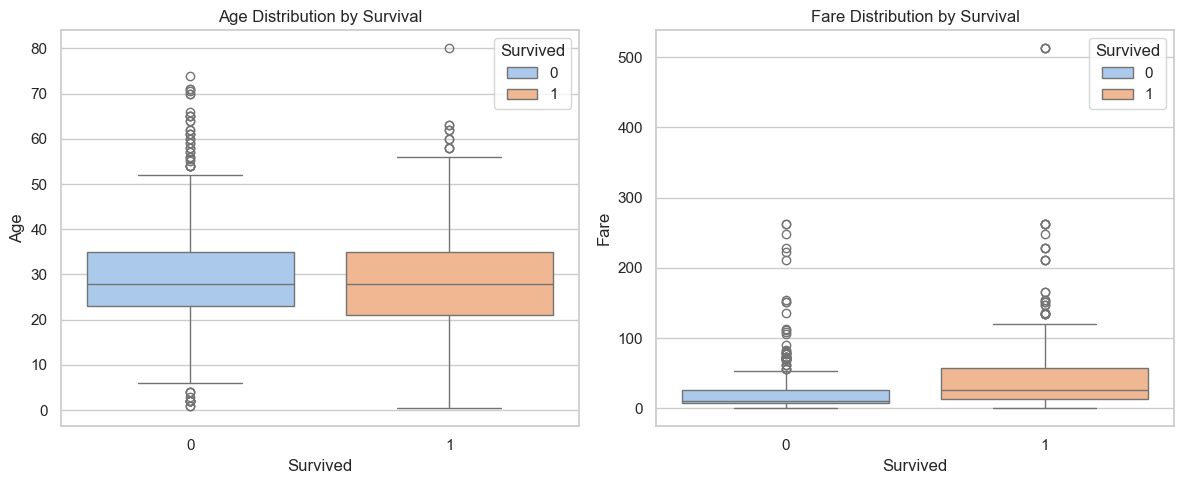

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Fare']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=df, x='Survived', y=col, hue='Survived', palette='pastel')  
    plt.title(f'{col} Distribution by Survival')
    plt.xlabel('Survived')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [61]:
## Feature Engineering Summary (Titanic Dataset)

# To improve predictive performance and extract meaningful patterns from the dataset, we apply the following feature engineering steps:

# 1. **Title Extraction from Name**  
#   - Extracts titles (e.g., Mr, Mrs, Miss) from passenger names.
#   - Groups rare titles into a single category `Rare`.
#   - Normalizes synonymous titles (`Mlle`, `Mme`, `Ms`) to a standard form.

#2. **Family Size Calculation**  
#   - `FamilySize` = `SibSp` + `Parch` + 1  
 #  - Reflects total members aboard with the passenger.

#3. **IsAlone Indicator**  
#   - Binary feature: 1 if traveling alone, else 0.

#4. **Fare Handling and Binning**  
 #  - Missing values in `Fare` are filled with median.
 #  - `FareBin`: Quartile-based binning of Fare into 4 groups (1 to 4).

#5. **Age Handling and Binning**  
#   - Missing values in `Age` filled with median.
#   - `AgeBin`: Categorizes age into 5 bins:  
 #    `[0-16], [17-32], [33-48], [49-64], [65+]`.

#6. **Display Preview**  
 #  - Shows a styled preview of selected engineered features for verification.


In [63]:
import pandas as pd

# Ensure df is defined
df = pd.read_csv('train.csv')

#  FEATURE ENGINEERING

#  Extract Title from Name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

#  Group rare titles into "Rare"
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

#  Normalize equivalent titles
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

#  Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#  Create IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

#  Fill missing Fare values
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

#  Create FareBin (quartile bins)
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4]).astype(int)

# Fill missing Age values
df['Age'] = df['Age'].fillna(df['Age'].median())

#  Create AgeBin
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 16, 32, 48, 64, 100], labels=[1, 2, 3, 4, 5]).astype(int)

#  Display clean DataFrame with selected columns
display_cols = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'AgeBin',
                'Fare', 'FareBin', 'Title', 'FamilySize', 'IsAlone']

df[display_cols].head(10).style.set_caption(" Titanic Dataset Snapshot with Feature Engineering").set_table_styles(
    [{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16px'), ('text-align', 'center')]}])


,PassengerId,Survived,Pclass,Sex,Age,AgeBin,Fare,FareBin,Title,FamilySize,IsAlone
0,1,0,3,male,22.000000,2,7.250000,1,Mr,2,0
1,2,1,1,female,38.000000,3,71.283300,4,Mrs,2,0
2,3,1,3,female,26.000000,2,7.925000,2,Miss,1,1
3,4,1,1,female,35.000000,3,53.100000,4,Mrs,2,0
4,5,0,3,male,35.000000,3,8.050000,2,Mr,1,1
5,6,0,3,male,28.000000,2,8.458300,2,Mr,1,1
6,7,0,1,male,54.000000,4,51.862500,4,Mr,1,1
7,8,0,3,male,2.000000,1,21.075000,3,Master,5,0
8,9,1,3,female,27.000000,2,11.133300,2,Mrs,3,0
9,10,1,2,female,14.000000,1,30.070800,3,Mrs,2,0


In [ ]:
# We’ll now explore how the engineered and 
   # original features correlate with Survival using insightful plots.
   
# > Survival Count:
#    The first plot shows that more passengers died (0) than survived (1), giving us an idea of class imbalance in our data.

# > Sex vs Survival:
#    Females had a much higher survival rate than males, aligning with the "women and children first" policy during evacuation.

# >  Pclass vs Survival:
#     1st Class passengers had significantly better survival chances than 2nd or 3rd class, likely because of their proximity to
#          lifeboats and better cabin locations.

#  > Embarked vs Survival:
#     Passengers who boarded from port 'C' (Cherbourg) had higher survival rates compared to other ports. Possibly, more wealthy 
#         passengers boarded there.

 # > Family Size vs Survival:
#     Small families (2–4 members) had the best survival chances. Being in a group may have helped, but very large families (>5) had lower survival
#       , possibly due to logistical difficulties during rescue.

#  > IsAlone vs Survival:
#     Passengers who were traveling alone had much lower survival rates, which shows that being with someone might have helped during the chaos.

#  > Title vs Survival:
#     Titles extracted from names showed strong signals: 'Mrs', 'Miss', and 'Master' had higher survival, while rare titles like 'Dr', 'Rev', and 'Col' 
#        were associated with low survival.

#  > Fare Bin vs Survival:
#     When I grouped fares into bins, I saw that higher fare ranges (FareBin 3 & 4) correlated with better survival — again hinting at 
#         socio-economic factors.

#  > Age Bin vs Survival:
#     Finally, age groups showed that children and young adults had slightly higher survival rates, while middle-aged adults were more at risk.

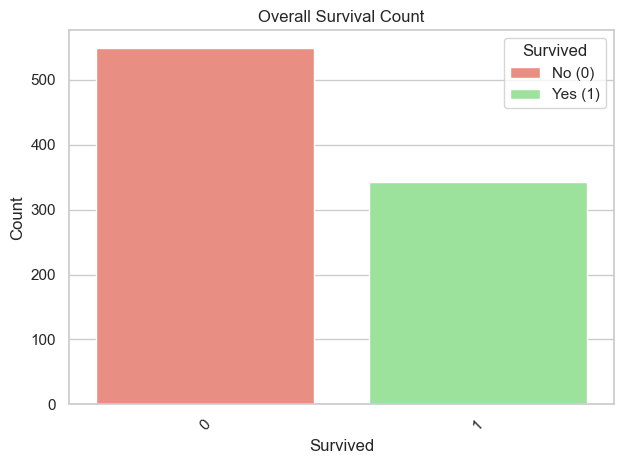

 Plot 1: Shows how many passengers survived (1) and didn't survive (0).


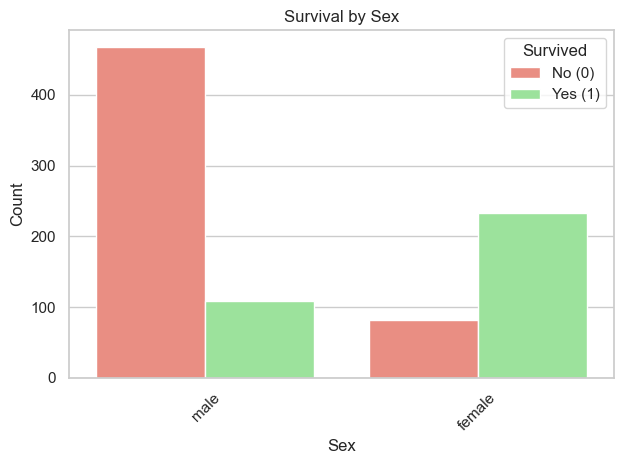

 Plot 2: Females had much higher survival rate than males.


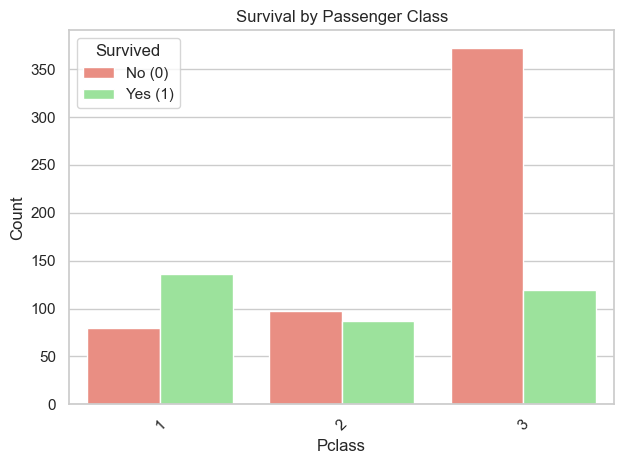

 Plot 3: Passengers in higher classes (Pclass 1) had better survival chances.


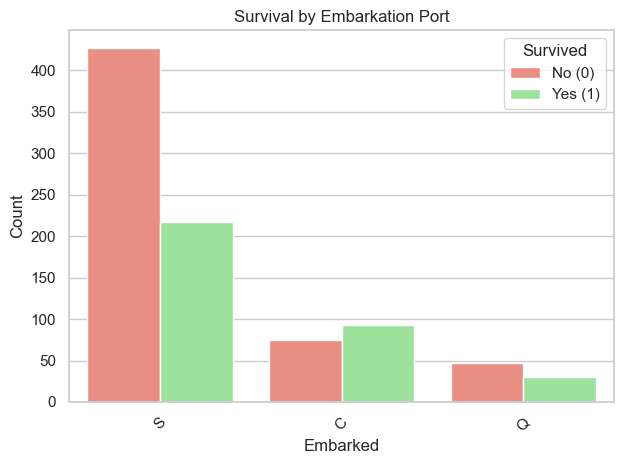

 Plot 4: Passengers from port C had better survival rates than others.


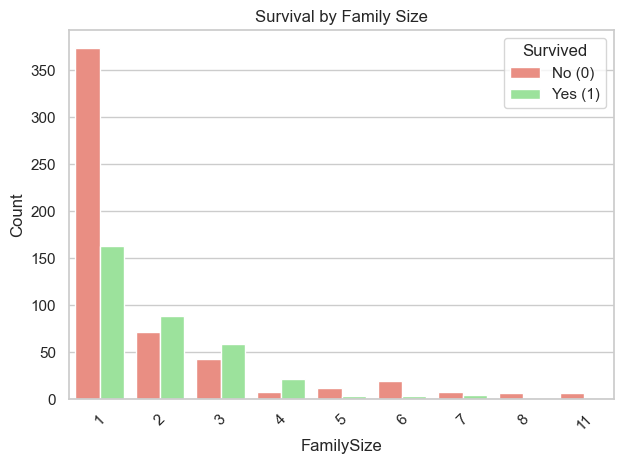

 Plot 5: Small families survived more; very large families had lower survival.


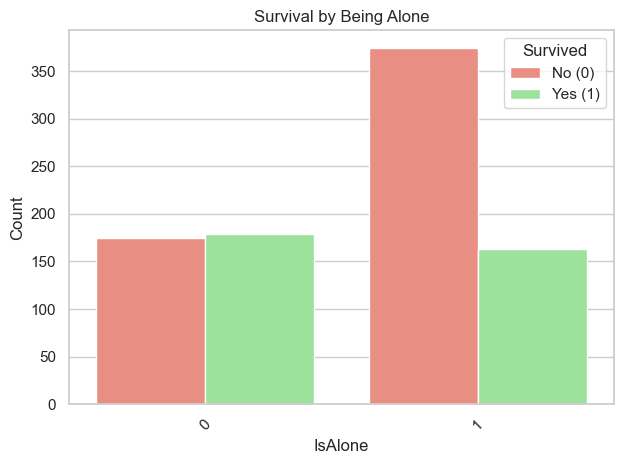

 Plot 6: Passengers traveling alone had lower survival rates.


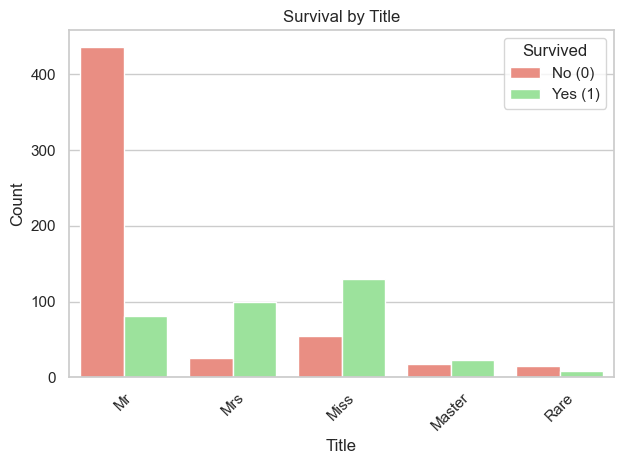

 Plot 7: Titles like 'Mrs' and 'Miss' show higher survival than 'Mr' or rare titles.


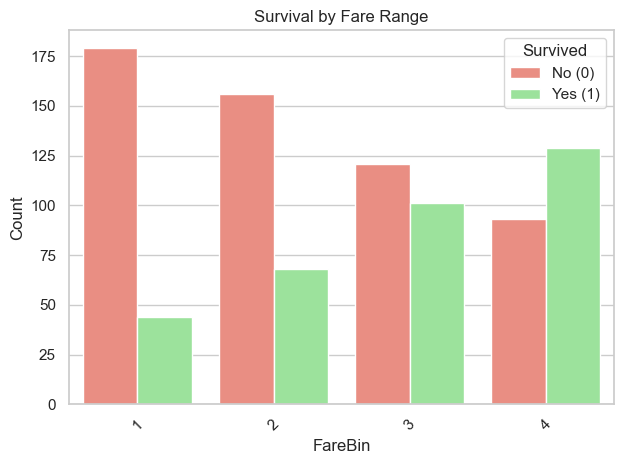

 Plot 8: Higher fare passengers (FareBin 3 & 4) had better survival rates.


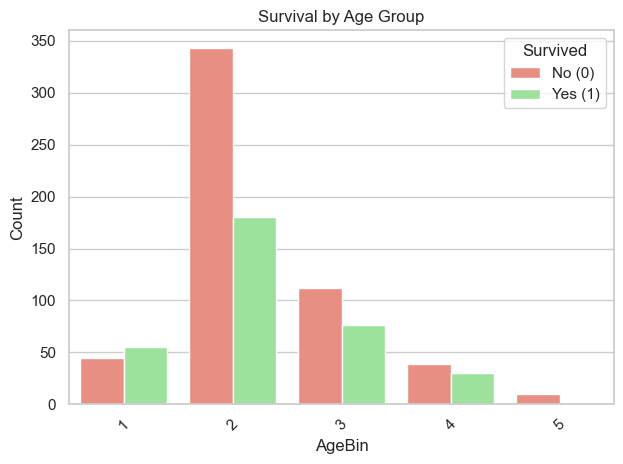

 Plot 9: Children and younger adults had slightly higher survival chances.


In [65]:
#QUICK COMPARISION !

# Set style
sns.set(style="whitegrid")
palette = {0: "salmon", 1: "lightgreen"}

def plot_count(feature, title=''):
    ax = sns.countplot(x=feature, hue='Survived', data=df, palette=palette)
    ax.set_title(title)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 1. Survival Count
plot_count('Survived', 'Overall Survival Count')
print(" Plot 1: Shows how many passengers survived (1) and didn't survive (0).")

# 2. Sex vs Survival
plot_count('Sex', 'Survival by Sex')
print(" Plot 2: Females had much higher survival rate than males.")

# 3. Pclass vs Survival
plot_count('Pclass', 'Survival by Passenger Class')
print(" Plot 3: Passengers in higher classes (Pclass 1) had better survival chances.")

# 4. Embarked vs Survival
plot_count('Embarked', 'Survival by Embarkation Port')
print(" Plot 4: Passengers from port C had better survival rates than others.")

# 5. Family Size vs Survival
plot_count('FamilySize', 'Survival by Family Size')
print(" Plot 5: Small families survived more; very large families had lower survival.")

# 6. IsAlone vs Survival
plot_count('IsAlone', 'Survival by Being Alone')
print(" Plot 6: Passengers traveling alone had lower survival rates.")

# 7. Title vs Survival
plot_count('Title', 'Survival by Title')
print(" Plot 7: Titles like 'Mrs' and 'Miss' show higher survival than 'Mr' or rare titles.")

# 8. Fare Bin vs Survival
plot_count('FareBin', 'Survival by Fare Range')
print(" Plot 8: Higher fare passengers (FareBin 3 & 4) had better survival rates.")

# 9. Age Bin vs Survival
plot_count('AgeBin', 'Survival by Age Group')
print(" Plot 9: Children and younger adults had slightly higher survival chances.")

In [ ]:
# Fare and Survived:
#  There’s a positive correlation between Fare and Survived, meaning passengers who paid higher fares had better survival chances.

#  Pclass and Survived:
#   Shows a negative correlation, because 1st class = lower numerical value (1) but higher survival, and 3rd class = higher value (3) but lower survival. Hence, the inverse relation.

#  SibSp and Parch Correlation:
#   SibSp and Parch show slight positive correlation with each other — makes sense since family members often travel together.

#  Age and Survived:
#   Correlation is slightly negative, indicating older passengers had lower survival rates, although not strongly.

#  Survived Correlations:
#   Overall, we use this to identify which numerical features influence survival — higher absolute correlation values with Survived are more useful for prediction.

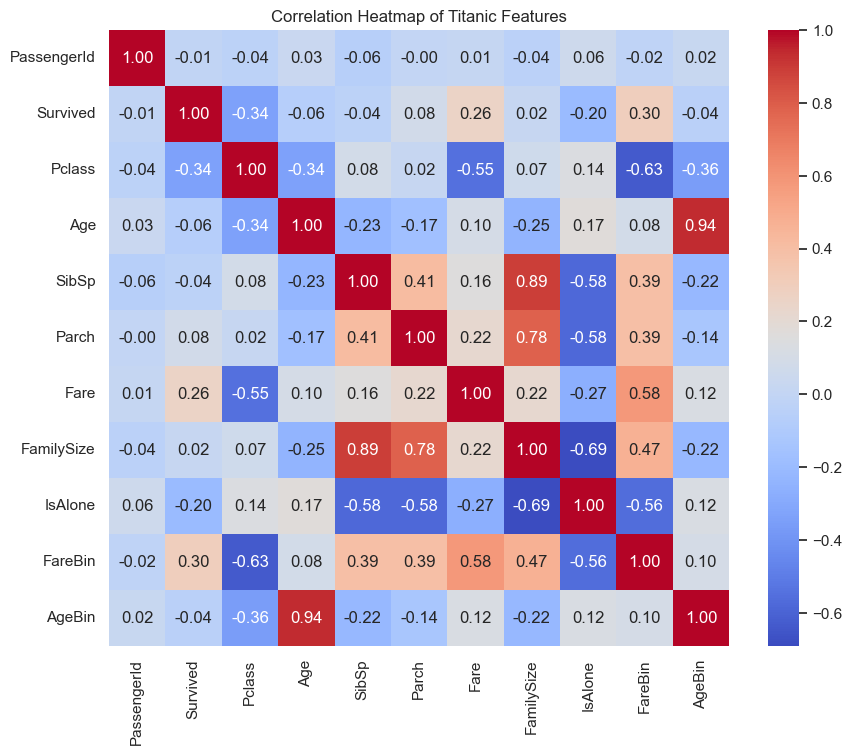

→ Shows correlation between numerical features and survival. Look for features with high +/- values with 'Survived'.


In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Titanic Features')
plt.show()
print("→ Shows correlation between numerical features and survival. Look for features with high +/- values with 'Survived'.")

In [ ]:
"""This Random Forest model gave us not only a way to predict survival but also insight into which features 
matter the most. It validated our feature engineering and gives us direction for optimizing 
further models (like tuning, ensembling, etc.).."""

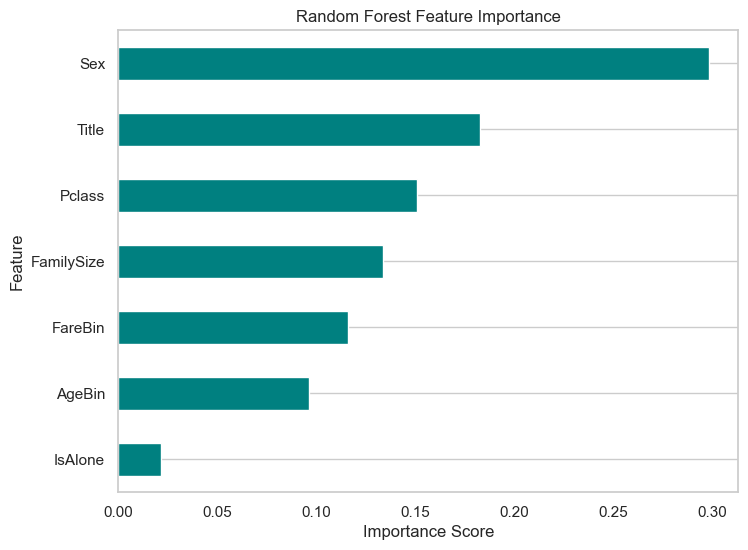

→ This plot ranks the most predictive features for survival using Random Forest.


In [69]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
df_model = df.copy()
label_cols = ['Sex', 'Embarked', 'Title']
for col in label_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

# Select relevant features for modeling
features = ['Pclass', 'Sex', 'AgeBin', 'FareBin', 'Title', 'FamilySize', 'IsAlone']
X = df_model[features]
y = df_model['Survived']

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance plot
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
feat_imp.plot(kind='barh', color='teal')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.show()

print("→ This plot ranks the most predictive features for survival using Random Forest.")


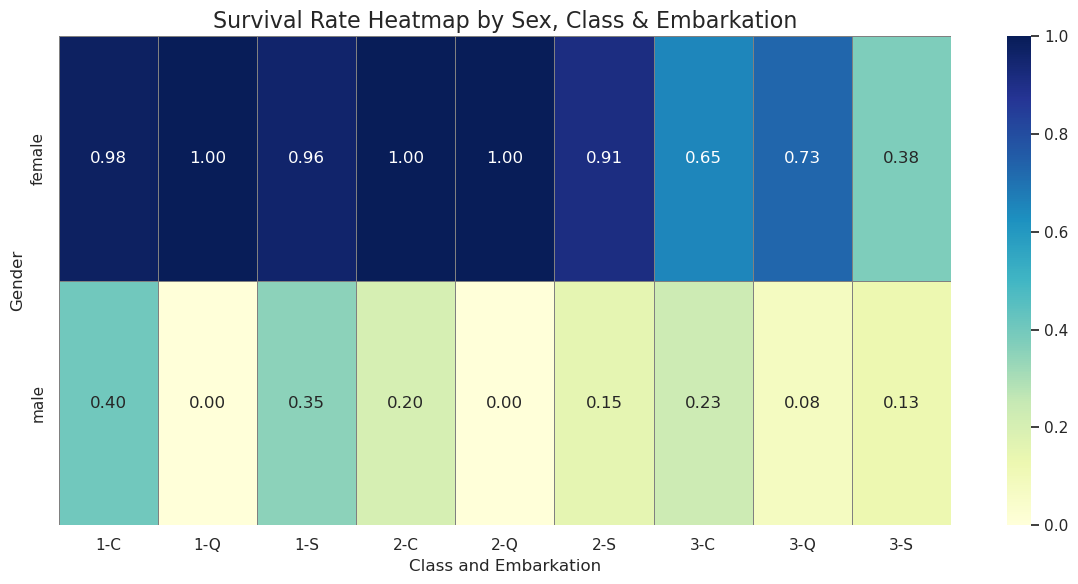

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['font.family'] = 'DejaVu Sans'

# Create a pivot table for survival rate by Sex, Pclass, and Embarked
pivot_table = df.pivot_table(index='Sex', columns=['Pclass', 'Embarked'], values='Survived')

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, linecolor='gray')

plt.title('Survival Rate Heatmap by Sex, Class & Embarkation', fontsize=16)
plt.xlabel('Class and Embarkation')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()


In [ ]:
##  Final EDA Summary: Survival Rate Heatmap

# To beautifully summarize and communicate key survival patterns based on major categorical features, 
#  we use a  heatmap to illustrate survival rates across combinations of gender, class, and embarkation port.

# This helps stakeholders quickly grasp how different groups were affected, forming a powerful storytelling visualization.

# >   Darker colors → lower survival rate  
# >   Lighter colors → higher survival rate 


# ===============================================================================================================================
# Conclusion:

"""
#  Females had a higher survival rate than males.

#  Passengers in 1st class had better survival odds.

#  Children and younger passengers had higher chances of survival.

#  Missing values in Age and Cabin were significant and needed careful treatment.

#  Family presence mattered
"""

# >> This analysis reveals that survival on the Titanic was not random — it was deeply influenced by gender, 
#     class, age, and travel companionship. These patterns highlight how social structures and emergency decision-making
#       shaped outcomes in a historical disaster."


# SO , I WOULD LIKE TO CONCLUDE SAYING :
                 """ “Survival on the Titanic wasn’t luck — it followed patterns 
                   written by class, gender, and circumstance..” :) """
